In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

register_matplotlib_converters()
from time import time

# Catfish Sales Data

In [3]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [4]:
# read data
catfish_sales = pd.read_csv(
    "data/catfish.csv", parse_dates=[0], index_col=0, squeeze=True, date_parser=parser
)

In [5]:
# infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [6]:
start_date = datetime(1996, 1, 1)
end_date = datetime(2000, 1, 1)
lim_catfish_sales = catfish_sales[start_date:end_date]

# Introduce an Anomaly

In [7]:
# At December 1 1998
lim_catfish_sales[datetime(1998, 12, 1)] = 10000

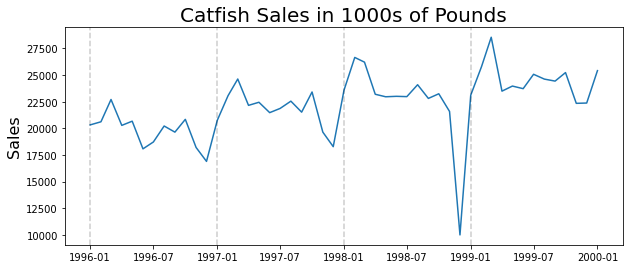

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(lim_catfish_sales)
plt.title("Catfish Sales in 1000s of Pounds", fontsize=20)
plt.ylabel("Sales", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )

## Remove the trend

In [9]:
first_diff = lim_catfish_sales.diff()[1:]

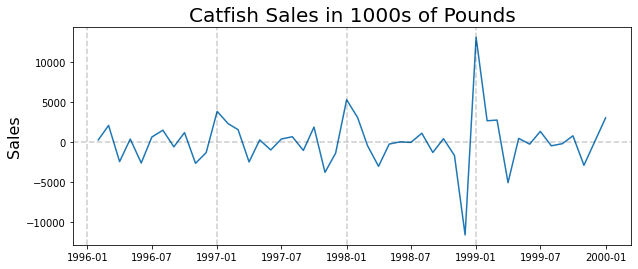

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(first_diff)
plt.title("Catfish Sales in 1000s of Pounds", fontsize=20)
plt.ylabel("Sales", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )
plt.axhline(0, color="k", linestyle="--", alpha=0.2)

# Get training and testing sets

In [11]:
train_end = datetime(1999, 7, 1)
test_end = datetime(2000, 1, 1)

test_data = lim_catfish_sales[train_end + timedelta(days=1) : test_end]

# Make Predictions

In [12]:
my_order = (0, 1, 0)
my_seasonal_order = (1, 0, 1, 12)

In [13]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[: train_end - timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.97975D+00    |proj g|=  1.75228D+00

At iterate    5    f=  9.39178D+00    |proj g|=  1.20685D-01

At iterate   10    f=  9.34571D+00    |proj g|=  4.85262D-03

At iterate   15    f=  9.33959D+00    |proj g|=  4.81289D-03

At iterate   20    f=  9.22403D+00    |proj g|=  9.77975D-04

At iterate   25    f=  9.21700D+00    |proj g|=  2.12321D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   

 This problem is unconstrained.



At iterate   25    f=  9.21072D+00    |proj g|=  2.81860D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   2.819D-05   9.211D+00
  F =   9.2107173150844179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.65296D+00    |proj g|=  6.06491D-01

At iterate    5    f=  9.39842D+00    |proj g|=  4.27933D-01

At iterate   10    f=  9.21880D+00    |proj g|=  7.74654D-02


 This problem is unconstrained.



At iterate   15    f=  9.17198D+00    |proj g|=  1.97125D-02

At iterate   20    f=  9.15255D+00    |proj g|=  4.41066D-02

At iterate   25    f=  9.14474D+00    |proj g|=  2.02486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     50      1     0     0   2.025D-03   9.145D+00
  F =   9.1447369496098450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02544D+01    |proj g|=  7.98549D-01

At iterate    5    f=  9.83594D+00    |proj g|=  2.30092D-01

At iterate   10    f=  9.54778D+00    |proj g|=  1.14897D-01

At iterate   15    f=  9.45375D+00    |proj g|=  1.97431D-02

At iterate   20    f=  9.41557D+00    |proj g|=  1.87689D-03

At iterate   25    f=  9.40035D+00    |proj g|=  1.96065D-03

At iterate   30    f=  9.07664D+00    |proj g|=  8.01048D-02

At iterate   35    f=  9.03304D+00    |proj g|=  4.57152D-04

At iterate   40    f=  9.03276D+00    |proj g|=  8.75692D-04

At iterate   45    f=  9.03219D+00    |proj g|=  2.14073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   15    f=  9.36816D+00    |proj g|=  3.41878D-02

At iterate   20    f=  9.20016D+00    |proj g|=  3.78037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   2.174D-06   9.200D+00
  F =   9.2000887749664368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42572D+00    |proj g|=  6.87883D-01

At iterate    5    f=  9.30519D+00    |proj g|=  5.58414D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  9.04515D+00    |proj g|=  7.97281D-03

At iterate   25    f=  9.04243D+00    |proj g|=  8.58329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     43      1     0     0   8.753D-03   9.042D+00
  F =   9.0424262244771310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [14]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

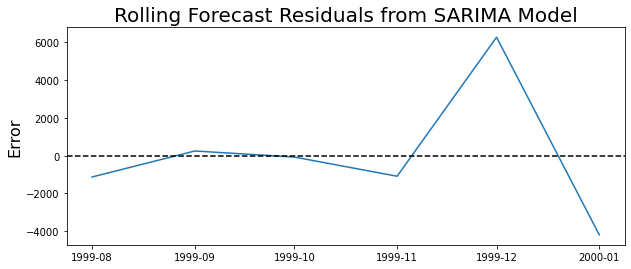

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle="--", color="k")
plt.title("Rolling Forecast Residuals from SARIMA Model", fontsize=20)
plt.ylabel("Error", fontsize=16)

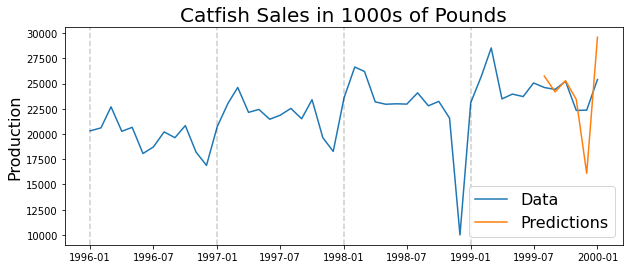

In [16]:
plt.figure(figsize=(10, 4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(("Data", "Predictions"), fontsize=16)

plt.title("Catfish Sales in 1000s of Pounds", fontsize=20)
plt.ylabel("Production", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )

In [17]:
print(
    "Mean Absolute Percent Error:",
    round(np.mean(abs(rolling_residuals / test_data)), 4),
)

Mean Absolute Percent Error: 0.0921


In [18]:
print("Root Mean Squared Error:", np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 3144.3795890445545


# Detecting the Anomaly

## Attempt 1: Deviation Method

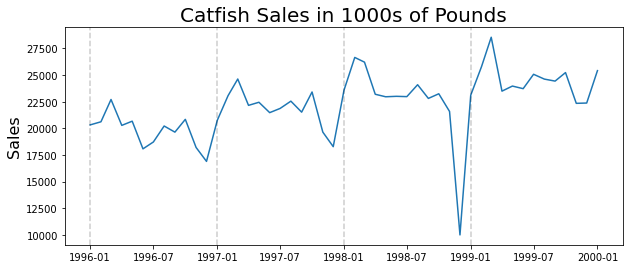

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(lim_catfish_sales)
plt.title("Catfish Sales in 1000s of Pounds", fontsize=20)
plt.ylabel("Sales", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )

In [40]:
rolling_deviations = pd.Series(dtype=float, index=lim_catfish_sales.index)

In [41]:
for date in rolling_deviations.index:
    # get the window ending at this data point
    window = lim_catfish_sales.loc[:date]

    # get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [ ]:
rolling_deviations

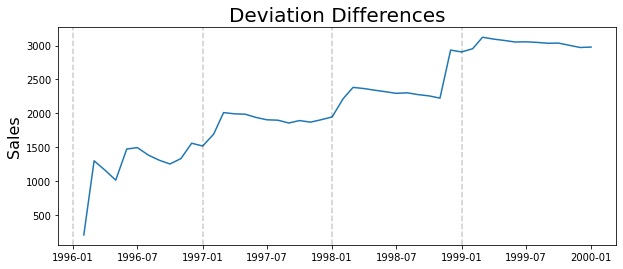

In [44]:
plt.figure(figsize=(10, 4))
plt.plot(rolling_deviations)
plt.title("Deviation Differences", fontsize=20)
plt.ylabel("Sales", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )

In [45]:
# get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff().dropna()

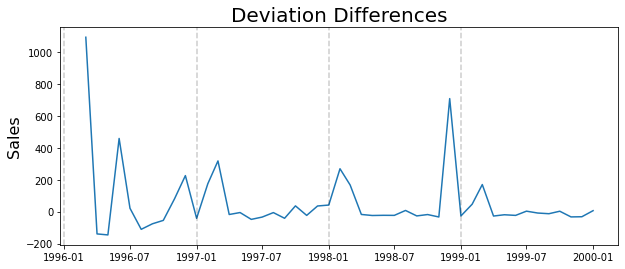

In [46]:
plt.figure(figsize=(10, 4))
plt.plot(diff_rolling_deviations)
plt.title("Deviation Differences", fontsize=20)
plt.ylabel("Sales", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )

## Attempt 2: Seasonal Method

In [47]:
month_deviations = lim_catfish_sales.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

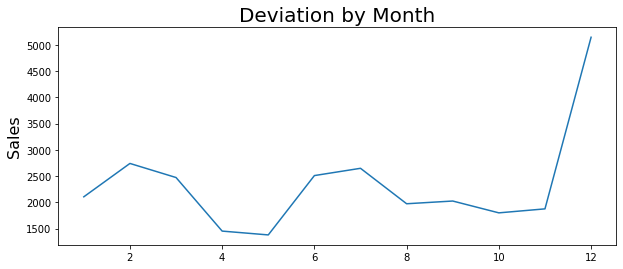

In [48]:
plt.figure(figsize=(10, 4))
plt.plot(month_deviations)
plt.title("Deviation by Month", fontsize=20)
plt.ylabel("Sales", fontsize=16)

## So, the anomaly occurs in a December

In [53]:
december_data = lim_catfish_sales[lim_catfish_sales.index.month == 12]

In [54]:
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [55]:
min_dev = 9999999
curr_anomaly = None
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

In [56]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

# What to do about the anomaly?

## Simple Idea: use mean of other months

In [57]:
adjusted_data = lim_catfish_sales.copy()
adjusted_data.loc[curr_anomaly] = december_data[
    (december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])
].mean()

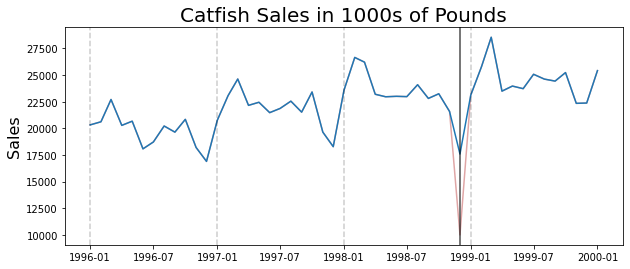

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(lim_catfish_sales, color="firebrick", alpha=0.4)
plt.plot(adjusted_data)
plt.title("Catfish Sales in 1000s of Pounds", fontsize=20)
plt.ylabel("Sales", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )
plt.axvline(curr_anomaly, color="k", alpha=0.7)

# Resulting Predictions

In [59]:
train_end = datetime(1999, 7, 1)
test_end = datetime(2000, 1, 1)

test_data = adjusted_data[train_end + timedelta(days=1) : test_end]

In [60]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[: train_end - timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05392D+00    |proj g|=  1.48123D+00

At iterate    5    f=  8.62551D+00    |proj g|=  1.30376D-01

At iterate   10    f=  8.57839D+00    |proj g|=  1.81045D-02

At iterate   15    f=  8.57762D+00    |proj g|=  1.83711D-04

At iterate   20    f=  8.57761D+00    |proj g|=  3.80103D-03

At iterate   25    f=  8.57362D+00    |proj g|=  5.68716D-02

At iterate   30    f=  8.52956D+00    |proj g|=  7.88541D-03

At iterate   35    f=  8.52915D+00    |proj g|=  5.99071D-03

At iterate   40    f=  8.52895D+00    |proj g|=  5.98202D-03

At iterate   45    f=  8.52886D+00    |proj g|=  3.57945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   25    f=  8.58256D+00    |proj g|=  3.36278D-02

At iterate   30    f=  8.53041D+00    |proj g|=  3.26583D-02

At iterate   35    f=  8.52883D+00    |proj g|=  5.17234D-03

At iterate   40    f=  8.52873D+00    |proj g|=  2.19639D-03

At iterate   45    f=  8.52867D+00    |proj g|=  1.98149D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46     66      1     0     0   1.958D-03   8.529D+00
  F =   8.5286716223803563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.23203D+00    |proj g|=  7.33299D-01

At iterate    5    f=  8.55894D+00    |proj g|=  1.55920D-02

At iterate   10    f=  8.55842D+00    |proj g|=  1.71520D-04

At iterate   15    f=  8.55831D+00    |proj g|=  8.13913D-03

At iterate   20    f=  8.54707D+00    |proj g|=  1.07810D-01

At iterate   25    f=  8.52172D+00    |proj g|=  4.86446D-04

At iterate   30    f=  8.52144D+00    |proj g|=  1.27528D-02

At iterate   35    f=  8.52098D+00    |proj g|=  5.16776D-03

At iterate   40    f=  8.52081D+00    |proj g|=  5.54908D-03

At iterate   45    f=  8.52077D+00    |proj g|=  2.09678D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  8.53748D+00    |proj g|=  1.01727D-01

At iterate   10    f=  8.51916D+00    |proj g|=  2.09444D-02

At iterate   15    f=  8.51793D+00    |proj g|=  1.65439D-04

At iterate   20    f=  8.51791D+00    |proj g|=  1.22805D-03

At iterate   25    f=  8.51684D+00    |proj g|=  1.20264D-02

At iterate   30    f=  8.51166D+00    |proj g|=  1.19810D-03

At iterate   35    f=  8.51159D+00    |proj g|=  1.20242D-03

At iterate   40    f=  8.51151D+00    |proj g|=  2.62167D-03

At iterate   45    f=  8.51148D+00    |proj g|=  4.32874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     62   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78260D+00    |proj g|=  6.79945D-01

At iterate    5    f=  8.60901D+00    |proj g|=  8.94712D-02

At iterate   10    f=  8.59939D+00    |proj g|=  2.79555D-03

At iterate   15    f=  8.59937D+00    |proj g|=  1.70003D-03

At iterate   20    f=  8.59907D+00    |proj g|=  3.32377D-03

At iterate   25    f=  8.55449D+00    |proj g|=  1.25848D-01


 This problem is unconstrained.



At iterate   30    f=  8.51571D+00    |proj g|=  1.04955D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     51      1     0     0   7.136D-04   8.516D+00
  F =   8.5157056271064544     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [61]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

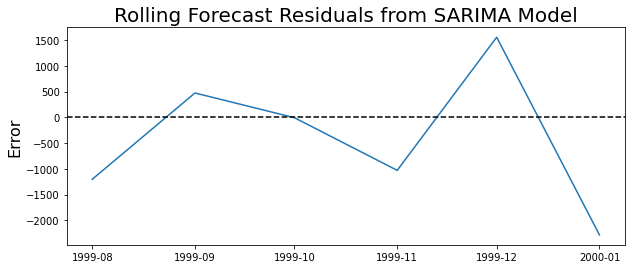

In [62]:
plt.figure(figsize=(10, 4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle="--", color="k")
plt.title("Rolling Forecast Residuals from SARIMA Model", fontsize=20)
plt.ylabel("Error", fontsize=16)

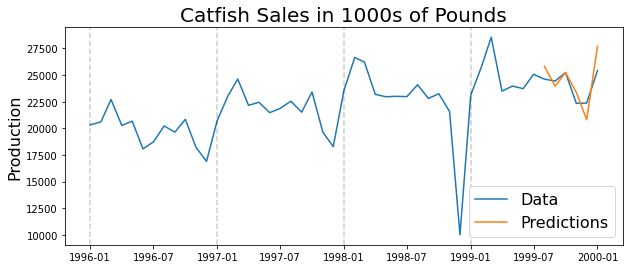

In [63]:
plt.figure(figsize=(10, 4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(("Data", "Predictions"), fontsize=16)

plt.title("Catfish Sales in 1000s of Pounds", fontsize=20)
plt.ylabel("Production", fontsize=16)
for year in range(start_date.year, end_date.year):
    plt.axvline(
        pd.to_datetime(str(year) + "-01-01"), color="k", linestyle="--", alpha=0.2
    )

In [64]:
print(
    "Mean Absolute Percent Error:",
    round(np.mean(abs(rolling_residuals / test_data)), 4),
)

Mean Absolute Percent Error: 0.0457


In [65]:
print("Root Mean Squared Error:", np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1314.793139623112
